In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def salt_and_pepper(oldimg, ps, pp):
    R, C = oldimg.shape[:2]
    L = oldimg.shape[2] if len(oldimg.shape) == 3 else 1
    number_of_salt = round(ps * R * C)
    number_of_pepper = round(pp * R * C)
    newimg = oldimg.copy()

    if L == 3:
        for i in range(number_of_salt):
            row = np.random.randint(R)
            column = np.random.randint(C)
            for y in range(3):
                newimg[row, column, y] = 255

        for i in range(number_of_pepper):
            row = np.random.randint(R)
            column = np.random.randint(C)
            for y in range(3):
                newimg[row, column, y] = 0
    else:
        for i in range(number_of_salt):
            row = np.random.randint(R)
            column = np.random.randint(C)
            newimg[row, column] = 255

        for i in range(number_of_pepper):
            row = np.random.randint(R)
            column = np.random.randint(C)
            newimg[row, column] = 0

    return newimg

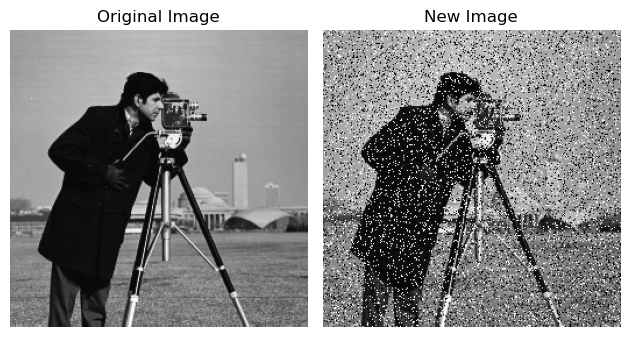

In [6]:
# Read the image
image = cv2.imread('cameraman.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Specify the parameter
ps= 0.1
pp=0.1

# Apply salt and pepper function
newImage = salt_and_pepper(gray_image, ps, pp)

# Display the original image and new image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(newImage, cmap='gray')
plt.title('New Image')
plt.axis('off')

plt.tight_layout()
plt.show()